# <span style="font-size:1.5em;"> Diagnosing Pediatric Pneumonia
X-ray image classifcation with Convolutional Neural Networks

Authors: Colin Pelzer, Tamiru Berhanu-Denka, Daniel Burdeno

# Contents
<l></l>

<span style="font-size:1.2em;">

- <a href="#Overview">Overview</a>

- <a href="#Business Understanding">Business Understanding</a>  

- <a href="#Data Understanding">Data Understanding</a>  

- <a href="#Data Preparation">Data Preparation</a>  
    
- <a href="#Model Creation">Model Creation</a>
    
- <a href="#Visualizations">Visualizations</a>
    
- <a href="#Conclusion">Conclusion</a>

- <a href="#Next Steps">Next Steps</a>

# <a id="#Overview">Overview</a>

 This project utlizes chest X-ray images to train a convolutional neural network for the identifcation/classifaction of pediatric pneumonia. We attempt to build a model that can accurately predict whether there is pneumonia in the lungs or not. An iterative approach to model building was taken in order to produce the highest accuracy and recall scores.

# <a id="#Business Understanding">Business Understanding</a>

Pneumonia is a form of acute respiratory infection that affects the lungs. The lungs are made up of small sacs called alveoli, which fill with air when a healthy person breathes. When an individual has pneumonia, the alveoli are filled with pus and fluid, which makes breathing painful and limits oxygen intake.

According to the Wolrd Health Organization(WHO), Pneumonia is the single largest infectious cause of death in children worldwide. Pneumonia killed 740,180 children under the age of 5 in 2019, accounting for 14% of all deaths of children under five years old but 22% of all deaths in children aged 1 to 5. Pneumonia affects children and families everywhere, but deaths are highest in South Asia and sub-Saharan Africa. Children can be protected from pneumonia, it can be prevented with simple interventions, and treated with low-cost, low-tech medication and care. Pneumonia in the pediatric population can be caused by various bacteria and viruses which sometimes maybe age-specific. Neonates are at risk for bacterial pathogens present in the birth canal. Viruses are the main cause of pneumonia in older infants and toddlers between 30 days and 2 years old. In children 2 to 5 years old, respiratory viruses are also the most common.

Despite the fact that there are multiple laboratory procedures applied to diagnose pneumonia including blood work and bacterial or viral identifcation; there are no clear guidelines for the routine use of chest x-ray in the pediatric population. Although the chest x-ray can be helpful in diagnosis and confirmation of pneumonia it carries with it risks, including radiation exposure, healthcare-associated costs, and false-negative results, increasing the use of unwarranted antibiotics.

In this project, we developed a neural network model to predict whether a chest x-ray image has penumomia or not using atificial intelligence algorithms. The model output from this project can be used to support the diagnosis of pneumonia by radiologists and medical professionals.The risk of false negative result is one of the decisive fator that compromize the use of x-ray for pneumonia diagnosis.Therefore, we wanted to address the context of "false negative" in our study, which is classifcation of an x-ray image as normal or without pneumonia when actually the image is from a pneumonic patient. Our objective is to decrease the chance of false negative result (recall) while obtaining a high accuracy. We will evaluate the model result by calculating the recall score(so as to specifically know the status of false negative) and accuarcy score(to predict all x-ray images accuarately. Henceforth, the recall and accuracy scores will be the metrices used for our project.

# <a id="Data Understanding">Data Understanding</a>

The data we used in this modeling were initially stored at Mendeley Data, a secure cloud-based repository by Kermany et al,2018 (Kermany Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2) and is available on kaggle.(https://www.kaggle.com/andrewmvd/pediatric-pneumonia-chest-xray?select=Pediatric+Chest+X-ray+Pneumonia).

The chest X-ray images were collected from patietns who visited Guangzhou Women and Children’s Medical Center, Guangzhou,China for a routine clinical care. The age of patients during data collection were between one to five years old.

A total of 5,856 Chest X-rays labelled as either pneumonia(4273) or normal(1583) were used for our study. In order to minimize the preprocessing time, each x-ray image were set at a uniform pixel of 64x64 befroe modeling.

# <a id="Data Preparation">Data Preparation</a>

## Load relevant packages

In [1]:

# Import Relevant Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image

# Neural network libraries

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, losses, metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, recall_score, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
np.random.seed(42)

In [59]:
# Create fucntion to show model progress and metrics
def show_metrics(history):
    results = history.history
    plt.figure()
    plt.plot(results['val_accuracy'], label = 'Validation Accuracy')
    plt.plot(results['accuracy'], label = 'Train Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show();
    
    plt.figure()
    plt.plot(results['val_recall'], label = 'Validation Recall')
    plt.plot(results['recall'], label = 'Train Recall')
    plt.title('Recall Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()
    plt.show();
    
    plt.figure()
    plt.plot(results['val_loss'], label = 'Validation Loss')
    plt.plot(results['loss'], label = 'Train Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show();

In [85]:
# Create function to display confusion matrices for models
def conf_mat(model):
    y_pred = model.predict(test_set)
    y_pred = (y_pred>0.5).astype(np.int)
    display(ConfusionMatrixDisplay(confusion_matrix(test_set.classes, y_pred), display_labels=['Normal', 'Pneumonia']).plot())

## Load Data

> On the given dataset, the validation data was very small in number i.e 16 images only. Therefore, we did a 80-20 split on the train dataset to use an alternative set of images for validation. We discarded the the given validation dataset of 16 images. 

In [2]:
# Set path to were dataset is saved (directory chest_xray) for train and test sets
train_path = 'chest_xray/train/' 
test_path = 'chest_xray/test/'

# Set a path within train dataset to both classes (NORMAL/PNEUMONIA)
train_n_path = train_path +'NORMAL/'
train_p_path = train_path +'PNEUMONIA/'

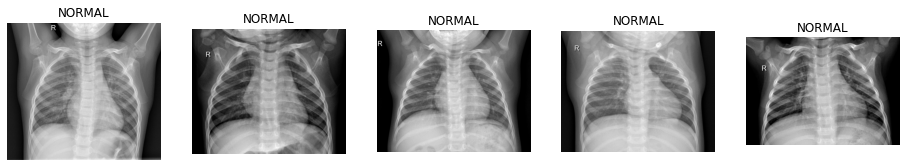

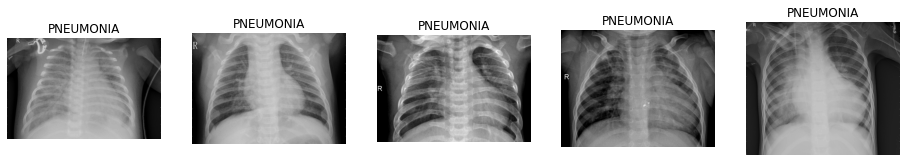

In [3]:
# View the first 5 images in train set for both normal and pneumonia
plt.figure(figsize=(16,16))
for n in range(5):
    normal_img = os.listdir(train_n_path)[n]
    normal_img_address = train_n_path+normal_img
    normal_load = Image.open(normal_img_address)
    ax = plt.subplot(5,5,n+1)
    plt.imshow(normal_load, cmap ='gray')
    plt.title("NORMAL")
    plt.axis("off")

plt.figure(figsize=(16,16))
for n in range(5):
    pneumonia_img =  os.listdir(train_p_path)[n]
    pneumonia_img_address = train_p_path+pneumonia_img
    pneumonia_load = Image.open(pneumonia_img_address)
    ax = plt.subplot(5,5,n+1)
    plt.imshow(pneumonia_load, cmap ='gray')
    plt.title("PNEUMONIA")
    plt.axis("off")

> In order to pass our image datasets through a neural network we need to preprocess the images into usable data. We rescale the data by dividing by 255 due to the images being x-ray (greyscale). We also resize each image to be 64 by 64 pixels so they are all the same size. Due to the unsuable nature of the validation set given, we utlize a validation split within ImageDataGenerator to produce a 80% - 20% split on our train set - validation set respectively. Class mode is binary as we are trying to predict normal vs. pneumonia images (binary classifcation).

In [4]:
# Utlize ImageDataGenerator from keras.preprocessing
img_dgen = ImageDataGenerator(rescale=1./255, validation_split = 0.20)

# Creation of train set, note the subset argument due to the validation split
train_set = img_dgen.flow_from_directory(train_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', subset='training')

# Creation of validation set from 20% of the train data
validation_set = img_dgen.flow_from_directory(train_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', subset='validation')

# Creation of test set from the test path, shuffle set to false for use in future model predictions
test_set = img_dgen.flow_from_directory(test_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', shuffle=False)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


> We also created a seperate set of data for use in the creation of a dummy model. This was necessary because sklearn DummyClassifer cannot utilize the same dataset file structure that Tensorflow can. 

In [5]:
# Batch size set to the number of images found above in order to not batch data for the dummy model. Validation set not needed for dummy model
train_set_dummy = img_dgen.flow_from_directory(train_path,
                                               target_size=(64, 64),
                                               color_mode='grayscale', 
                                               class_mode='binary', 
                                               subset='training', 
                                               batch_size=4173)

test_set_dummy = img_dgen.flow_from_directory(test_path, 
                                              target_size=(64, 64),
                                              color_mode='grayscale',
                                              class_mode='binary',
                                              shuffle=False,
                                              batch_size=624)

# Split train and test dummy sets into images and corresponding labels for dummy model training
train_images, train_labels = next(train_set_dummy)
test_images, test_labels = next(test_set_dummy)

Found 4173 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Dataset Augmentation

> Our first models were created using the initial generated datasets, after training of these models we then realized we would need to perform data augmentation in order to produce quality results. We conduct a variety of augmentations utlizing the ImageDataGenerator. Augmentation was only performed on the train_set, again withholding 20% for the validation set. This augmented data set was then used to train subsequent models in our final netowrk.

In [6]:
#Creating the augumented data

train_datagen_aug = ImageDataGenerator(rescale=1./255,
                                   validation_split = 0.20,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

train_set_aug = train_datagen_aug.flow_from_directory(train_path, target_size=(64, 64), 
                                         color_mode='grayscale', class_mode='binary', subset='training')

Found 4173 images belonging to 2 classes.


# <a id="Model Creation">Model Creation</a> 

> Performance of our models was measured using both accuracy score and recall score. Recall score is important in order to minimize the number of false negative results. We want to avoid classifing an image with pneumonia as being normal as much as possible. 

## Baseline (dummy) Model

In [7]:
# sklearn dummy classifer that will always return the most frequent class (pneumonia)
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(train_images, train_labels)

DummyClassifier(strategy='most_frequent')

In [44]:
# Scoring dummy model for accuracy and recall
base_acc = baseline_model.score(test_images, test_labels)
print(base_acc)

# Generate predicts using model
y_pred_base = baseline_model.predict(test_images)

# Recall score
base_recall = recall_score(test_labels, y_pred_base)
print(base_recall)

0.625
1.0


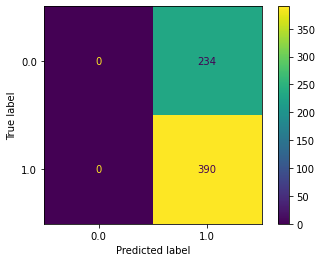

In [9]:
# Visualize confusion matrix for dummy model
plot_confusion_matrix(baseline_model, test_images, test_labels)

> Given that our baseline model will always predict the positive class (most frequent) the recall score of 1 is misleading as we do not have any false negatives. The low accuracy score is reflective of the high amount of false positives. While we do care more about false negatives than false postives, we want to also increase accuracy as much as possible by reducing misclassfied images, while maintaining a high recall score. From the baseline model we moved on to a simple dense neural network.

## Simple Neural Network

In [70]:
# Creation of neural network model
simple_model = models.Sequential([
    layers.Flatten(input_shape=(64, 64, 1)),
    layers.Dense(20, activation='relu'),
    layers.Dense(7, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

simple_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

simple_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 20)                81940     
_________________________________________________________________
dense_23 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 6         
Total params: 82,133
Trainable params: 82,133
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Fit the train_set data to the simple model built above and use validation set 
simple_history = simple_model.fit(train_set,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 30s 232ms/step - loss: 0.4496 - accuracy: 0.7879 - recall: 0.9874 - auc: 0.8366 - prc: 0.9315 - val_loss: 0.3514 - val_accuracy: 0.8380 - val_recall: 0.9935 - val_auc: 0.9424 - val_prc: 0.9787
Epoch 2/30
131/131 [==============================] - 29s 222ms/step - loss: 0.3048 - accuracy: 0.9029 - recall: 0.9845 - auc: 0.9604 - prc: 0.9845 - val_loss: 0.2950 - val_accuracy: 0.9175 - val_recall: 0.9768 - val_auc: 0.9629 - val_prc: 0.9873
Epoch 3/30
131/131 [==============================] - 29s 218ms/step - loss: 0.2612 - accuracy: 0.9279 - recall: 0.9800 - auc: 0.9737 - prc: 0.9906 - val_loss: 0.3133 - val_accuracy: 0.9003 - val_recall: 0.8903 - val_auc: 0.9442 - val_prc: 0.9832
Epoch 4/30
131/131 [==============================] - 30s 227ms/step - loss: 0.2380 - accuracy: 0.9394 - recall: 0.9784 - auc: 0.9770 - prc: 0.9921 - val_loss: 0.2443 - val_accuracy: 0.9300 - val_recall: 0.9548 - val_auc: 0.9740 - val_prc: 0.9918
Epoch 5/30
1

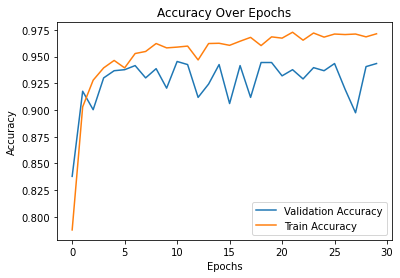

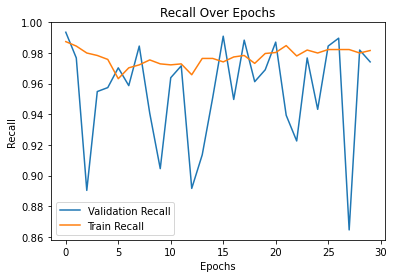

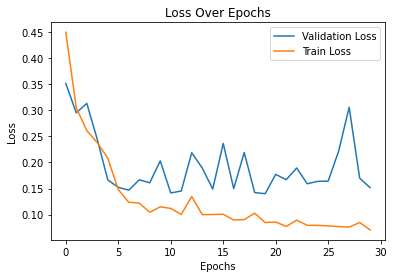

In [74]:
show_metrics(simple_history)

In [72]:
# Evaluate our simple model on the test set
simple_model.evaluate(test_set)

20/20 [==============================] - 3s 139ms/step - loss: 1.3393 - accuracy: 0.7308 - recall: 0.9923 - auc: 0.8062 - prc: 0.8165


[1.3393124341964722,
 0.7307692170143127,
 0.9923076629638672,
 0.8062349557876587,
 0.8165119886398315]

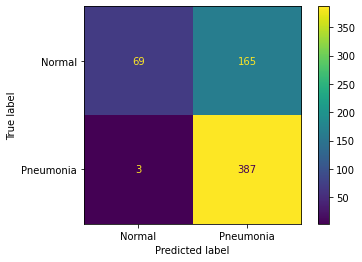

In [78]:
conf_mat(simple_model)

> For our first iteration of neural network model we only used Dense network layers to see if we could improve from the dummy model. Our final activation layer will be sigmoid for all future models as we are predicting a binary classification. We will also use binary crossentropy as our loss funcation because of this. The Adam optimizer was chosen as it is well known to perform the best for image classifcation. The input shape matches the image resizng we did in the data generation step. While the simple performed well on the train data, as well as the validation data, it did not on the test data and we still have a high amount of false predictions. Our model is heavily overfit as we would expect from a simple dense network. We will attempt to add in convolutional layers in order to improve the model and reduce overfitting.

## Convolutional Neural Network Models

In [81]:
# We decided to add in two Conv2d layers at different levels, as well as a max pooling layer after each. 
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                802880    
_________________________________________________________________
dense_29 (Dense)             (None, 1)               

In [82]:
cnn_history = cnn_model.fit(train_set,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 34s 260ms/step - loss: 0.3646 - accuracy: 0.8342 - recall: 0.9903 - auc: 0.9166 - prc: 0.9683 - val_loss: 0.1958 - val_accuracy: 0.9156 - val_recall: 0.9910 - val_auc: 0.9874 - val_prc: 0.9958
Epoch 2/30
131/131 [==============================] - 33s 253ms/step - loss: 0.1345 - accuracy: 0.9485 - recall: 0.9694 - auc: 0.9846 - prc: 0.9940 - val_loss: 0.1064 - val_accuracy: 0.9597 - val_recall: 0.9819 - val_auc: 0.9920 - val_prc: 0.9974
Epoch 3/30
131/131 [==============================] - 33s 253ms/step - loss: 0.1066 - accuracy: 0.9573 - recall: 0.9726 - auc: 0.9908 - prc: 0.9969 - val_loss: 0.1102 - val_accuracy: 0.9636 - val_recall: 0.9690 - val_auc: 0.9911 - val_prc: 0.9971
Epoch 4/30
131/131 [==============================] - 33s 252ms/step - loss: 0.0886 - accuracy: 0.9691 - recall: 0.9813 - auc: 0.9937 - prc: 0.9978 - val_loss: 0.1030 - val_accuracy: 0.9616 - val_recall: 0.9703 - val_auc: 0.9919 - val_prc: 0.9974
Epoch 5/30
1

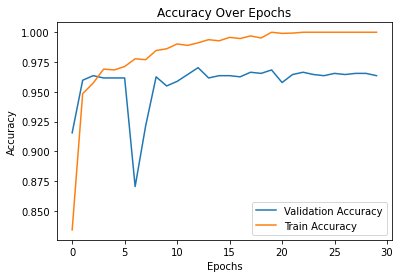

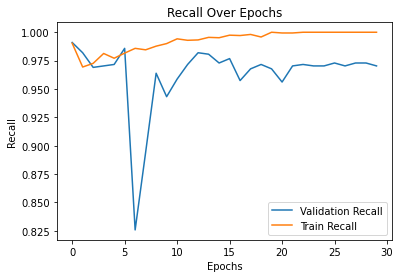

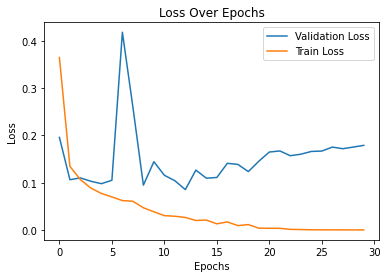

In [83]:
show_metrics(cnn_history)

In [84]:
cnn_model.evaluate(test_set)

20/20 [==============================] - 3s 141ms/step - loss: 3.0026 - accuracy: 0.7692 - recall: 0.9897 - auc: 0.7502 - prc: 0.7710


[3.002641439437866,
 0.7692307829856873,
 0.9897435903549194,
 0.7501972317695618,
 0.7709677219390869]

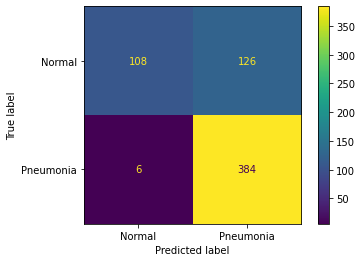

In [18]:
conf_mat(cnn_model)

> The first cnn model resulted in an accuracy and recall score of 76.92% and 98.97% respectively. While we still have a high recall score, the accuracy score incresed only a little bit. Therefore, with the objective of improving the accuracy score, we decided to run the second cnn model by adding "Dropout" to reduce overfitting.

In [64]:
#Second cnn model with the objective of improving the accuracy score

cnn2_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn2_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

cnn2_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)               

In [65]:
cnn2_history = cnn2_model.fit(train_set,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 34s 262ms/step - loss: 0.2781 - accuracy: 0.8835 - recall: 0.9642 - auc: 0.9354 - prc: 0.9750 - val_loss: 0.1284 - val_accuracy: 0.9540 - val_recall: 0.9510 - val_auc: 0.9896 - val_prc: 0.9965
Epoch 2/30
131/131 [==============================] - 33s 252ms/step - loss: 0.1332 - accuracy: 0.9482 - recall: 0.9668 - auc: 0.9856 - prc: 0.9948 - val_loss: 0.1098 - val_accuracy: 0.9569 - val_recall: 0.9806 - val_auc: 0.9909 - val_prc: 0.9969
Epoch 3/30
131/131 [==============================] - 34s 259ms/step - loss: 0.1082 - accuracy: 0.9585 - recall: 0.9745 - auc: 0.9899 - prc: 0.9961 - val_loss: 0.1088 - val_accuracy: 0.9588 - val_recall: 0.9548 - val_auc: 0.9936 - val_prc: 0.9979
Epoch 4/30
131/131 [==============================] - 33s 253ms/step - loss: 0.0964 - accuracy: 0.9636 - recall: 0.9758 - auc: 0.9918 - prc: 0.9968 - val_loss: 0.1509 - val_accuracy: 0.9415 - val_recall: 0.9239 - val_auc: 0.9942 - val_prc: 0.9981
Epoch 5/30
1

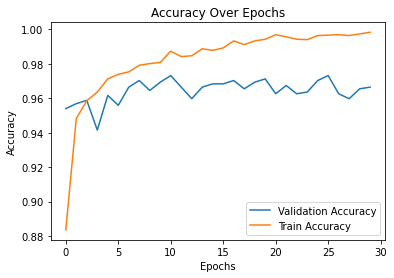

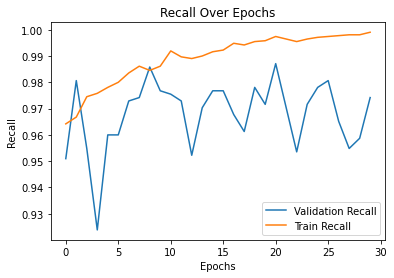

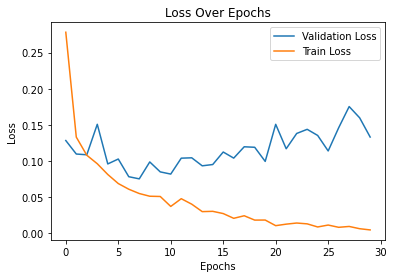

In [66]:
show_metrics(cnn2_history)

In [67]:
cnn2_model.evaluate(test_set)

20/20 [==============================] - 3s 139ms/step - loss: 2.3374 - accuracy: 0.7756 - recall: 0.9872 - auc: 0.7754 - prc: 0.7895


[2.3373539447784424,
 0.7756410241127014,
 0.9871794581413269,
 0.775399923324585,
 0.7895121574401855]

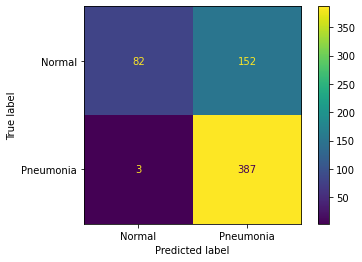

In [22]:
conf_mat(cnn2_model)

> In the second CNN model the accuracy score slightly increased to 77.56%. However, the recall score had a very slight decrease. Based on the above metrics, this model is still heavily overfit. Since we are not satisficed by the accuracy score, we still wanted to run another model while maintaining the recall score. Hence, we decided to add additional convolutional layers in order to regularize and capture more information. We also added associated "Pooling" and "Dropout" layers.

In [51]:
cnn3_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn3_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

cnn3_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 64)         

In [52]:
cnn3_history = cnn3_model.fit(train_set,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 36s 272ms/step - loss: 0.3736 - accuracy: 0.8339 - recall: 0.9555 - auc: 0.8727 - prc: 0.9492 - val_loss: 0.2190 - val_accuracy: 0.9204 - val_recall: 0.9148 - val_auc: 0.9726 - val_prc: 0.9914
Epoch 2/30
131/131 [==============================] - 34s 258ms/step - loss: 0.1871 - accuracy: 0.9267 - recall: 0.9526 - auc: 0.9714 - prc: 0.9895 - val_loss: 0.1451 - val_accuracy: 0.9434 - val_recall: 0.9445 - val_auc: 0.9851 - val_prc: 0.9952
Epoch 3/30
131/131 [==============================] - 32s 243ms/step - loss: 0.1546 - accuracy: 0.9422 - recall: 0.9606 - auc: 0.9795 - prc: 0.9919 - val_loss: 0.1333 - val_accuracy: 0.9463 - val_recall: 0.9406 - val_auc: 0.9895 - val_prc: 0.9966
Epoch 4/30
131/131 [==============================] - 32s 244ms/step - loss: 0.1208 - accuracy: 0.9576 - recall: 0.9700 - auc: 0.9879 - prc: 0.9955 - val_loss: 0.1067 - val_accuracy: 0.9655 - val_recall: 0.9768 - val_auc: 0.9915 - val_prc: 0.9973
Epoch 5/30
1

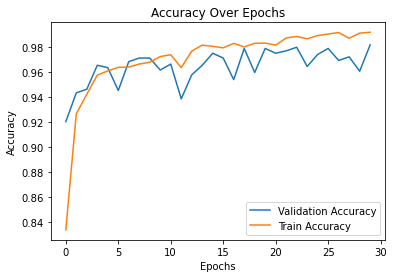

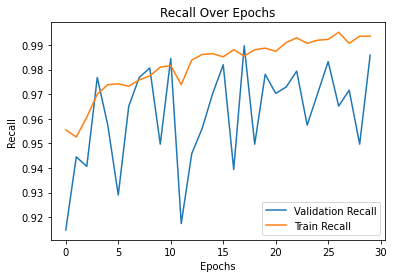

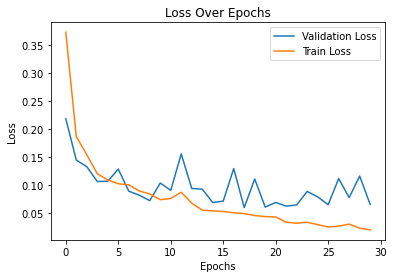

In [62]:
show_metrics(cnn3_history)

In [53]:
cnn3_model.evaluate(test_set)

20/20 [==============================] - 3s 147ms/step - loss: 1.9111 - accuracy: 0.7436 - recall: 0.9949 - auc: 0.7751 - prc: 0.7884


[1.9110982418060303,
 0.7435897588729858,
 0.9948717951774597,
 0.7751041054725647,
 0.7883948087692261]

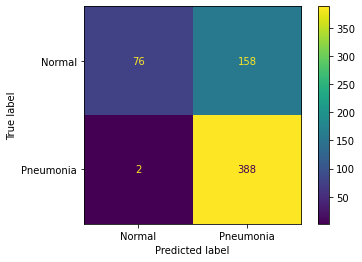

In [54]:
conf_mat(cnn3_model)

> On the third CNN model, the accuracy score dropped to 74.36 % from 77.56% on the second model. Whereas, the recall score slightly increased to 99.49% from 98.72% on the second model. Based on the metric curves shown above, we are trying to narrow the gap between the train and validation sets. We still wanted to improve the accuracy score and decided to perform data augmentation to capture more information on the training data set so as to better classify our testing set. We also added additional "Dropout" to reduce overfitting.

In [47]:
cnn4_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn4_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

cnn4_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 64)       

In [48]:
cnn4_history = cnn4_model.fit(train_set_aug,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 35s 267ms/step - loss: 0.5586 - accuracy: 0.7364 - recall: 0.9548 - auc: 0.6087 - prc: 0.8186 - val_loss: 0.5352 - val_accuracy: 0.7421 - val_recall: 0.9987 - val_auc: 0.7025 - val_prc: 0.8830
Epoch 2/30
131/131 [==============================] - 34s 263ms/step - loss: 0.4621 - accuracy: 0.7608 - recall: 0.9345 - auc: 0.7916 - prc: 0.9147 - val_loss: 0.6147 - val_accuracy: 0.5839 - val_recall: 0.4400 - val_auc: 0.9098 - val_prc: 0.9706
Epoch 3/30
131/131 [==============================] - 38s 290ms/step - loss: 0.4054 - accuracy: 0.7965 - recall: 0.8829 - auc: 0.8497 - prc: 0.9449 - val_loss: 0.3775 - val_accuracy: 0.8274 - val_recall: 0.7974 - val_auc: 0.9199 - val_prc: 0.9738
Epoch 4/30
131/131 [==============================] - 40s 305ms/step - loss: 0.3816 - accuracy: 0.8076 - recall: 0.8910 - auc: 0.8698 - prc: 0.9533 - val_loss: 0.4295 - val_accuracy: 0.7670 - val_recall: 0.6865 - val_auc: 0.9356 - val_prc: 0.9793
Epoch 5/30
1

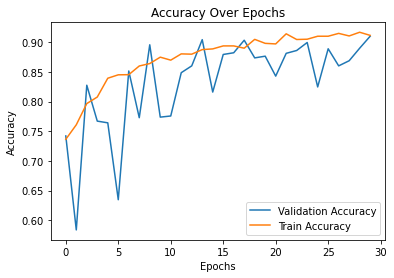

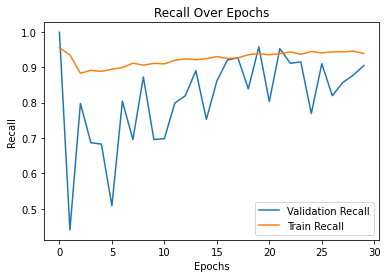

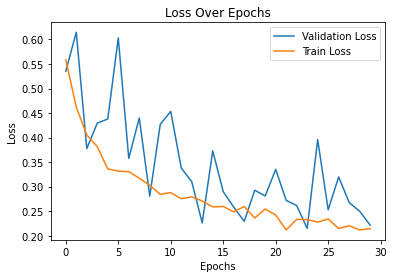

In [61]:
show_metrics(cnn4_history)

In [49]:
cnn4_model.evaluate(test_set)

20/20 [==============================] - 3s 137ms/step - loss: 0.2943 - accuracy: 0.8878 - recall: 0.9590 - auc: 0.9489 - prc: 0.9653


[0.2943493127822876,
 0.8878205418586731,
 0.9589743614196777,
 0.9489315748214722,
 0.9652852416038513]

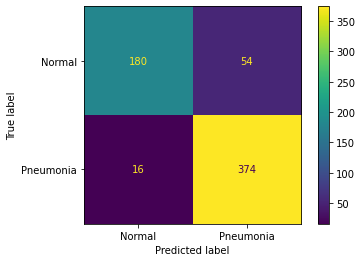

In [50]:
conf_mat(cnn4_model)

> The use of augmented data has drastically improved our accuracy score to 88.78%. We did however see a minor decrease in the recall score to 95.90%. As a final attempt to improve either accuracy or recall score, we decided to investigate a slightly different activation function for the next model.


In [31]:
cnn5_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=layers.LeakyReLU(), input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU()),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation=layers.LeakyReLU()),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation=layers.LeakyReLU()),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

cnn5_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', metrics.Recall(name='recall'), metrics.AUC(name='auc'), metrics.AUC(name='prc', curve='PR')])

cnn5_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)       

In [36]:
cnn5_history = cnn5_model.fit(train_set_aug,
                    epochs=30,
                    batch_size=32,
                    validation_data=validation_set)

Epoch 1/30
131/131 [==============================] - 35s 268ms/step - loss: 0.5279 - accuracy: 0.7539 - recall: 0.9658 - auc: 0.6822 - prc: 0.8585 - val_loss: 0.4641 - val_accuracy: 0.7996 - val_recall: 0.7639 - val_auc: 0.9017 - val_prc: 0.9666
Epoch 2/30
131/131 [==============================] - 35s 271ms/step - loss: 0.3820 - accuracy: 0.8126 - recall: 0.9058 - auc: 0.8718 - prc: 0.9524 - val_loss: 0.5604 - val_accuracy: 0.6894 - val_recall: 0.5819 - val_auc: 0.9410 - val_prc: 0.9810
Epoch 3/30
131/131 [==============================] - 35s 265ms/step - loss: 0.3424 - accuracy: 0.8370 - recall: 0.9039 - auc: 0.9014 - prc: 0.9637 - val_loss: 0.5061 - val_accuracy: 0.7335 - val_recall: 0.6413 - val_auc: 0.9553 - val_prc: 0.9856
Epoch 4/30
131/131 [==============================] - 35s 263ms/step - loss: 0.3073 - accuracy: 0.8636 - recall: 0.9148 - auc: 0.9219 - prc: 0.9721 - val_loss: 0.7262 - val_accuracy: 0.6433 - val_recall: 0.5200 - val_auc: 0.9529 - val_prc: 0.9848
Epoch 5/30
1

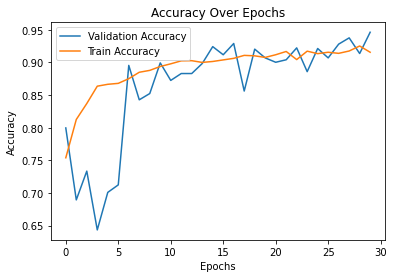

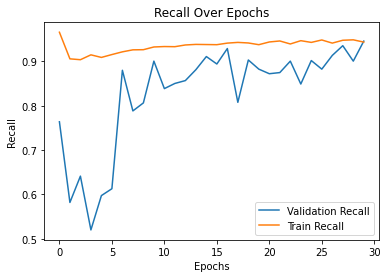

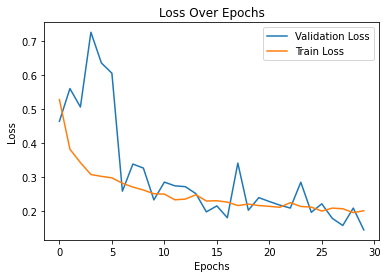

In [60]:
show_metrics(cnn5_history)

In [45]:
cnn5_loss, cnn5_acc, cnn5_recall, cnn5_auc, cnn5_prc = cnn5_model.evaluate(test_set)

20/20 [==============================] - 3s 134ms/step - loss: 0.3337 - accuracy: 0.8734 - recall: 0.9795 - auc: 0.9561 - prc: 0.9668


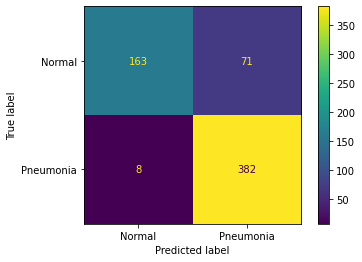

In [42]:
conf_mat(cnn5_model)

> We wanted to see if a change in the activation function has impact on the accuracy and recall scores. Therefore, we tried the 'LeakyReLU' activation function on the fifth CNN model instead of 'relu'which we used on the fourth CNN model. The result indicated an in increase in accuracy but decreased the recall score. Sicne our objective is mainly to increase te recall score, while maintaining a relatively higher accuracy score, we intend to use the 'relu' activation but not the 'LeakyReLU'. We felt that the slight trade off between lower accuracy and higher recall score is justifyable in the context of classifying pneumonia in order to reduce the number of false negative results.This helps to minimize the number of patients who actully have pneumonia but diagnosed as normal or healty.This also helps to incrase in the number of correctly diagnosed penumonic patients using chest xray.

# <a id="Visualizations">Visualizations</a>

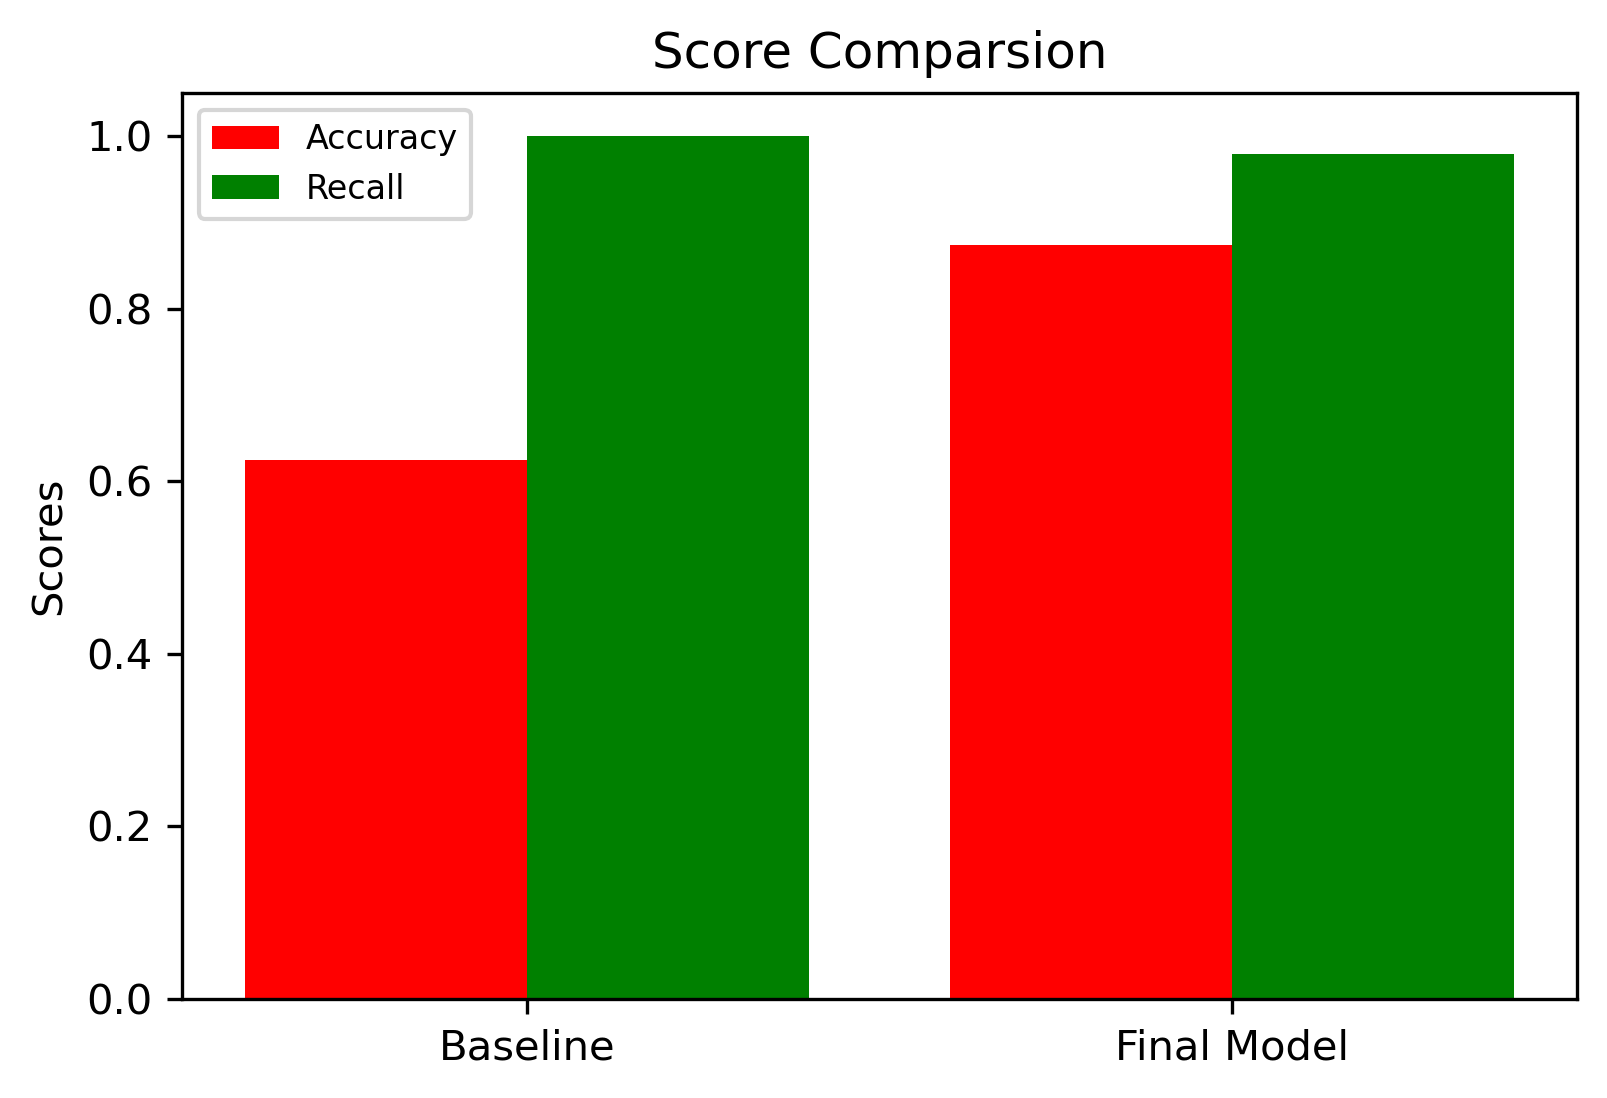

In [46]:
# Creating a grouped bar chart comparing the baseline accuracy and recall with the final moodel. 

x = np.arange(2)
acc_scores = [base_acc, cnn5_acc]
prec_scores = [base_recall, cnn5_recall]
width = 0.4

fig, ax = plt.subplots(dpi=300)
plt.bar(x - 0.2, acc_scores, width, color='r')
plt.bar(x + 0.2, prec_scores, width, color='g')
plt.xticks(x, ['Baseline', 'Final Model'])
plt.ylabel('Scores')
plt.title('Score Comparsion')
ax.legend(['Accuracy', 'Recall'], fontsize=8)
plt.savefig('Images/Comparison.png');

# <a id="Conclusion">Conclusion</a>

Comparing all the accuracy and recall scores form the models, the score form the fifth model was selected since it showed the highest recall score of 98% while maintaining a high accuracy score of 87%. Thus, we recommend the Radiological society of North America to leverage this information in the day to day x-ray evaluation of pediatric pneumonia. Application of this tool helps pediatricians and radiologists to classify pneumonic chest x-ray accurately 87% of the time and 98% of the time the physician could minimize the false negative error. The best trade off between accuracy and recall scores was used to address the issue of false negative rate. Maximum reduction of false negative errors is critical to eliminate misdiagnosing patients with pneumonia as being healthy, which would lead to the child not receiving treatment. This in turn helps to prevent the spread of pneumonia of infectious origin. We recommend this model to be used as a first diagnostic step in identification of pediatric pneumonia.

# <a id="Next Steps">Next Steps</a>

Processing another model following certain adjustments on the data with the goal of improving the recall and accuracy scores are always important to correctly classify images. Therefore, our next step will be getting more data with a better quality x-ray images from multiple sources. We also wanted to identify pneumonia based on causal agents and be able to classify between them. Further adjustment of hyperparameters could potentially increase both accuracy and recall scores. 